In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [19]:
from PIML.box.boxWR import BoxWR

In [20]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [96.01813236724372, 98.07979533353551, 94.4418401004677, 78.8846095686016, 69.72130704399036, 60.060064702911134, 49.5768426076998, 27.355160532054764, 14.137017701335214, 5.937418350808265, 3.752660566196912]
Top10 eigs [95.64 42.19 19.84 11.19  4.69  3.26  3.13  2.48  1.8   1.37]
Building RBF with gaussan kernel on data shape (6886,)
Building RBF with gaussan kernel on data shape (6886, 10)


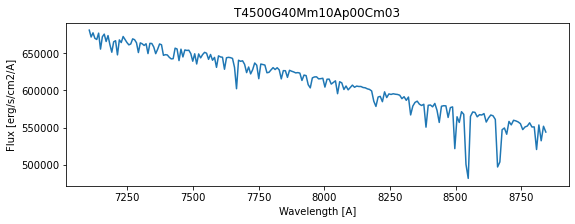

In [21]:
W="RedM"; R="C"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

In [22]:
NL, NL2 = 100, 30
b.estimate_snr(NL), b.estimate_snr(NL2)

(5.605717886902897, 17.53877634606558)

In [23]:
diff_10k_100, bias_10k_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
# diff_10k_30, bias_10k_30 = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL2)
# diff_1M_100, bias_1M_100 = b.eval_pca_bias(b.PhyMid, 1000000, noise_level=NL)

noise_level 100


In [9]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

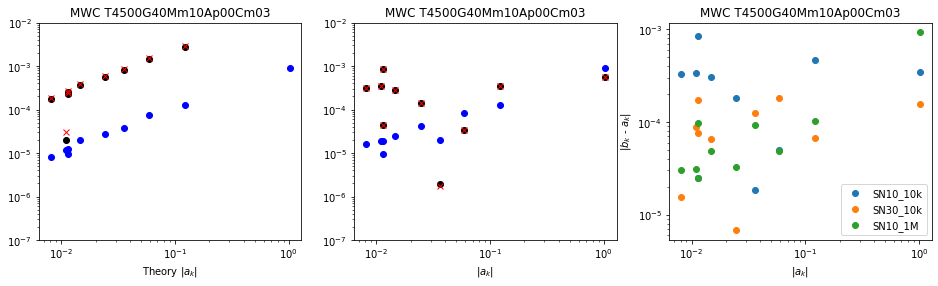

In [24]:
b.plot_bias_evals(diffs, bias_1M_100, bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])

In [11]:
ak = b.rbf_coeff(b.PhyMid)

In [12]:
ak

array([-1.01586281, -0.12231402,  0.03588269, -0.05906231,  0.01143219,
        0.00808636,  0.01088144,  0.01140936, -0.02440867,  0.0146933 ])

In [13]:
b.save_ak()

In [14]:
b.plot_Dak()

TypeError: plot_Dak() missing 1 required positional argument: 'Dak'